In [66]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Step 1: Load the dataset
data = pd.read_csv("data/Order1.csv")

# Step 2: Data preprocessing
# Renaming columns for clarity (optional)
data.rename(columns={"Member_number": "TransactionID", "itemDescription": "Item"}, inplace=True)

# Step 3: Group transactions by TransactionID
# Each transaction will be a list of items
transactions = data.groupby("TransactionID")["Item"].apply(list)

# Step 4: Create a one-hot encoded DataFrame for Apriori
# Flatten the transactions to create a binary matrix
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

# Step 5: Apply the Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.09, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)
# Step 6: Generate association rules
from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets,num_itemsets=2, metric="lift", min_threshold=1.0)

# Display association rules
print("Association Rules:")
print(rules)


Frequent Itemsets:
     support                             itemsets
0   0.119548                               (beef)
1   0.158799                       (bottled beer)
2   0.213699                      (bottled water)
3   0.135967                        (brown bread)
4   0.126475                             (butter)
5   0.165213                        (canned beer)
6   0.100564                            (chicken)
7   0.185480                       (citrus fruit)
8   0.114931                             (coffee)
9   0.120831                               (curd)
10  0.133145                      (domestic eggs)
11  0.137506                        (frankfurter)
12  0.102617                  (frozen vegetables)
13  0.124936              (fruit/vegetable juice)
14  0.116983                          (margarine)
15  0.139815                         (newspapers)
16  0.376603                   (other vegetables)
17  0.177527                             (pastry)
18  0.170600                   

C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


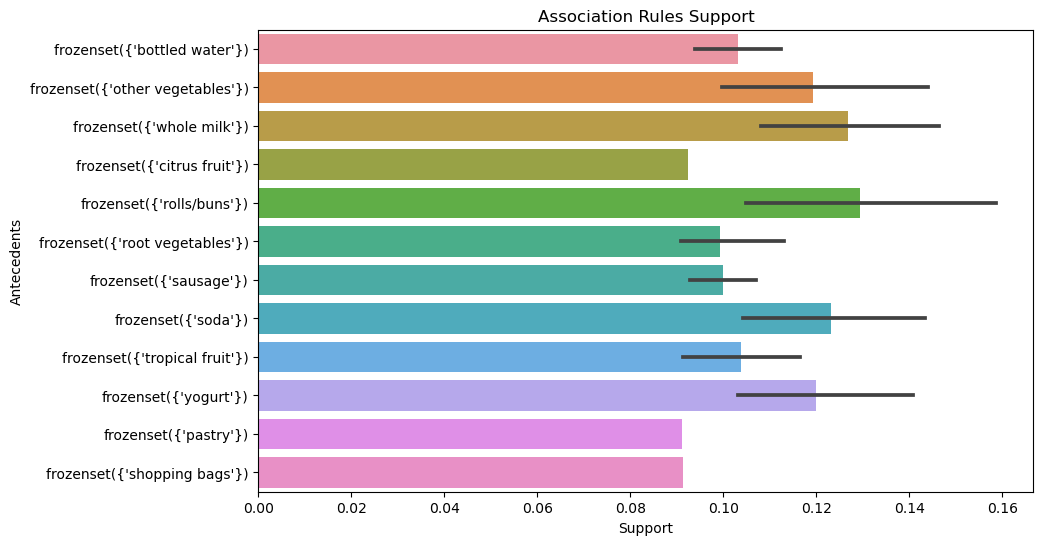

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='antecedents', data=rules)
plt.title('Association Rules Support')
plt.xlabel('Support')
plt.ylabel('Antecedents')
plt.show()



C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


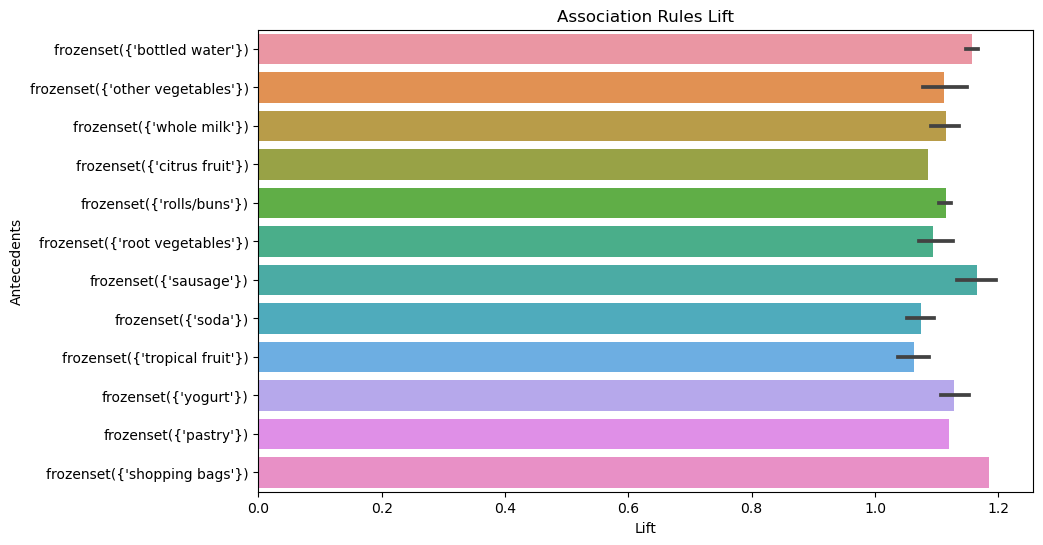

C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


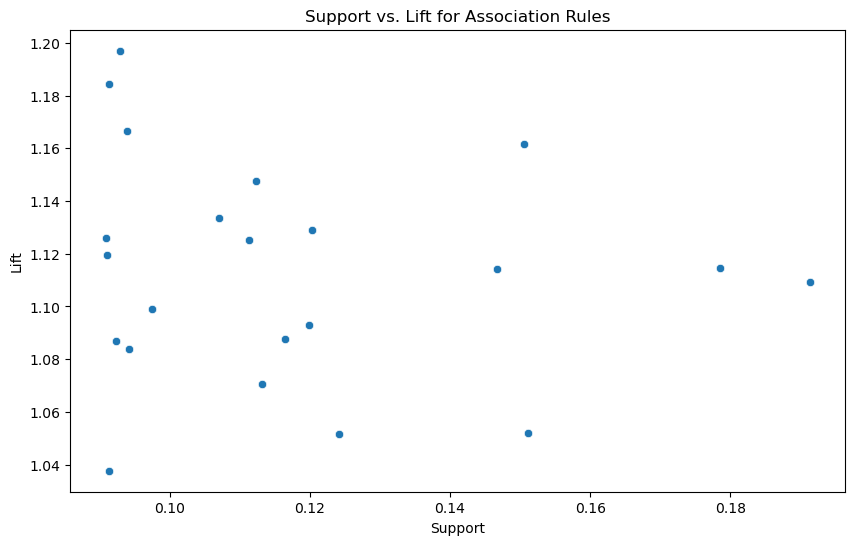

In [69]:
# Visualization 2: Plot the lift of the association rules
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', data=rules)
plt.title('Association Rules Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.show()

# Visualization 3: Scatter plot of support vs. lift for the association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='lift', data=rules)
plt.title('Support vs. Lift for Association Rules')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()
